In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf

In [21]:
data = pd.read_csv('../Data/boston.csv')

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [22]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404, 1), (102, 13), (102, 1))

In [23]:
input_shape = X_train.shape[1]

input_shape

13

In [24]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(input_shape,)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer='adam', loss='mse')


In [25]:
epochs = 100
batch_size = 8

results = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/100
51/51 [==============================] - 0s 2ms/step - loss: 0.5442 - val_loss: 0.2652
Epoch 2/100
51/51 [==============================] - 0s 796us/step - loss: 0.2250 - val_loss: 0.1967
Epoch 3/100
51/51 [==============================] - 0s 868us/step - loss: 0.1819 - val_loss: 0.1870
Epoch 4/100
51/51 [==============================] - 0s 858us/step - loss: 0.1574 - val_loss: 0.1556
Epoch 5/100
51/51 [==============================] - 0s 844us/step - loss: 0.1142 - val_loss: 0.1591
Epoch 6/100
51/51 [==============================] - 0s 846us/step - loss: 0.1076 - val_loss: 0.1462
Epoch 7/100
51/51 [==============================] - 0s 853us/step - loss: 0.0962 - val_loss: 0.1405
Epoch 8/100
51/51 [==============================] - 0s 825us/step - loss: 0.0764 - val_loss: 0.1400
Epoch 9/100
51/51 [==============================] - 0s 805us/step - loss: 0.0757 - val_loss: 0.1343
Epoch 10/100
51/51 [==============================] - 0s 844us/step - loss: 0.0684 - val_loss

In [26]:
error = model.evaluate(X_test, y_test, verbose=1)

print('MSE: %.3f, RMSE: %.3f' % (error, np.sqrt(error)))

4/4 [==============================] - 0s 736us/step - loss: 0.1265
MSE: 0.127, RMSE: 0.356


In [27]:
y_pred = model.predict(X_test)

# y_pred, y_test

4/4 [==============================] - 0s 576us/step


In [28]:
# metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('TensorFlow Model')
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2: ', r2_score(y_test, y_pred))

TensorFlow Model
MAE:  0.23834196219954498
MSE:  0.12650382467275484
RMSE:  0.355673761574782
R2:  0.8543727560381829


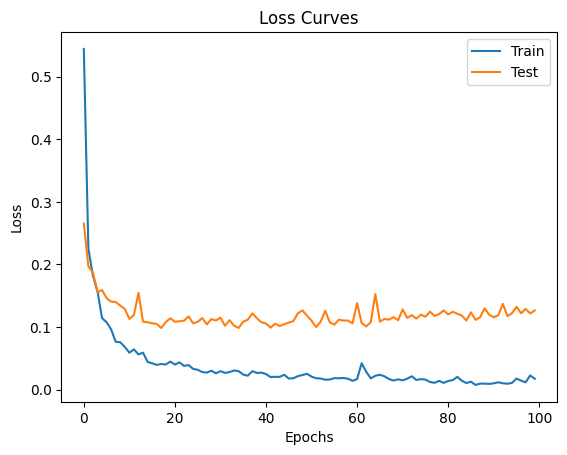

Epochs:  100
dict_keys(['loss', 'val_loss'])


In [29]:
plt.title('Loss Curves')
plt.plot(results.history['loss'], label='Train')
plt.plot(results.history['val_loss'], label='Test')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
print('Epochs: ', len(results.epoch))
print(results.history.keys())